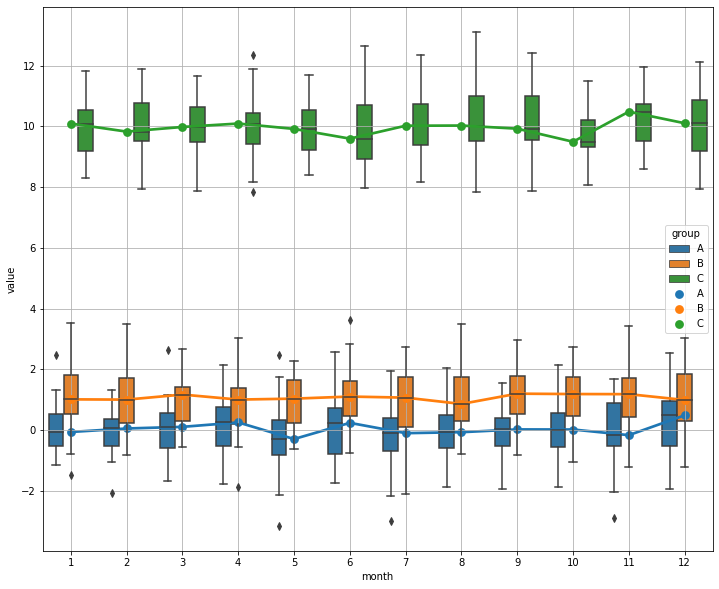

In [1]:
import pandas as pd
import numpy.random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
n = 365
df = pd.DataFrame(data = {"A": rnd.randn(n),
                          "B": rnd.randn(n)+1,
                          "C": rnd.randn(n) + 10, # will not be plotted
                         },
                  index=pd.date_range(start="2017-01-01", periods=n, freq="D"))
df['month'] = df.index.month

df_plot = df.melt(id_vars='month', value_vars=["A", "B",'C'])
df_plot.columns=['month','group','value']
fig,ax=plt.subplots(figsize=(12,10))
kek=df_plot.groupby(['month','group']).median()
kek.reset_index(inplace=True)
ax=sns.boxplot(x='month', y='value', hue='group', data=df_plot)
sns.pointplot(x='month', y='value', hue='group',data=kek, ax=ax)
ax.grid(True)